# Sequential, or On-Line, or Stochastic Gradient Descent, Training of a Linear Model

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\count}[2]{\underset{#1}{\overset{#2}{\operatorname{\#}}}}
$

Remember how we started deriving the expression for the weights that
minimized the sum of squared errors of a linear model:

With $y$ being an affine (linear + constant) function of $x$,

$$
    y(\xv;\wv) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = \xv^T \wv
$$

having parameters $\wv = (w_0, w_1, w_2, \ldots, w_D)$, we derived the
solution to 

$$
\begin{align*}
\wv_{\mbox{best}} &= \argmin{\wv} \sum_{n=1}^N (t_n - y(\xv_n ; \wv))^2\\
 & = \argmin{\wv} \sum_{n=1}^N (t_n - \xv_n^T \wv)^2
 \end{align*}
$$

We did this by rewriting the above summation as a matrix expression,
taking its derivative with respect to $\wv$, setting the derivative
equal to zero, and solving for $\wv$.

$$
      \wv = (X^T X)^{-1} X^T T
$$

But what if you have thousands or millions of samples?  $X$ and $T$
can be quite large. To avoid dealing with matrix operations on huge
matrices, we can derive a sequential algorithm for finding $\wv$ by
using the fact that a derivative of a sum is the sum of the
derivatives.

$$
\begin{align*}
\frac{\partial \sum_{n=1}^N (t_n - \xv_n^T \wv)^2}{\partial \wv} 
&= 
\sum_{n=1}^N \frac{\partial (t_n - \xv_n^T \wv)^2}{\partial \wv}\\
&= 
\sum_{n=1}^N 2 (t_n - \xv_n^T  \wv) (-1) \xv_n\\
&= -2 \sum_{n=1}^N (t_n - \xv_n^T  \wv) \xv_n\\
\end{align*}
$$

So far this is just another way to write the matrix equation for
$\wv$.  However, instead of summing over all $N$ samples, what if we
just update $\wv$ after each sample based on the derivative of the
squared error for that sample?  The derivative for a sample $n$ can be
considered as a limited, or noisy, sample of the overall derivative.
Thus, we can take a small step in the direction of the negative derivative to try
to bring a current guess at the weight vector, $\wv^{(k)}$, on
iteration $k$ closer to a value that reduces the overall error.

$$
\begin{align*}
\wv^{(k+1)} &= \wv^{(k)} - (-2) \eta (t_n - \xv_n^T  \wv) \xv_n\\
 &= \wv^{(k)} + \eta (t_n - \xv_n^T  \wv) \xv_n
\end{align*}
$$

For this sequential algorithm to converge, $\eta$ must decrease with
each iteration, not too fast but not too slow. 

This algorithm is called the least mean squares (LMS) algorithm
developed by Widrow and Hoff.  It is now often referred to as the
''stochastic gradient descent'' algorithm for linear models.

Let's animate the progress down the derivative, using the tutorial on animations at [
A Simple Animation: The Magic Triangle](http://nbviewer.ipython.org/url/jakevdp.github.io/downloads/notebooks/MagicTriangle.ipynb).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

In [7]:
nSamples = 1000
xs = np.random.uniform(0,10,nSamples)
ys = 2 - 0.1 * xs + np.random.normal(0,0.1,nSamples)

X1 = np.hstack((np.ones((nSamples,1)), xs.reshape((-1,1))))
T = ys.reshape((-1,1))

w = np.zeros((2,1))
eta = 0.001

X1.shape, T.shape, w.shape

((1000, 2), (1000, 1), (2, 1))

KeyboardInterrupt: 

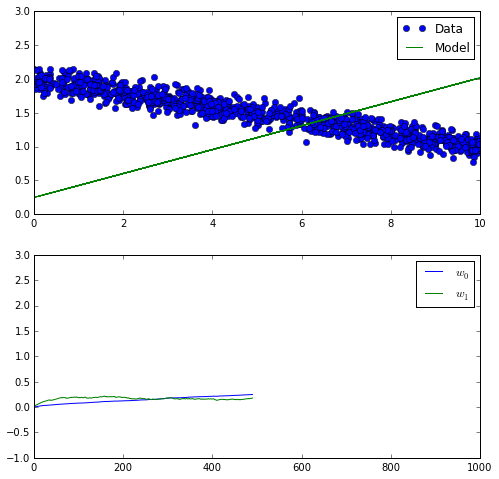

In [8]:
fig = plt.figure(figsize=(8,8))

nIterations = 1000

ws = []
for rep in range(nIterations):
    n = rep % nSamples
    predicted = np.dot(X1[n:n+1,:],w)
    w += eta * (T[n:n+1, :] - predicted) * X1[n:n+1,:].T
    ws.append(w.copy())
    
    if rep % 10 == 0:
        plt.clf()
        plt.subplot(2,1,1)
        plt.plot(xs,ys,'o')
        plt.plot(xs,np.dot(X1,w))
        plt.legend(('Data','Model'), loc='upper right')
        plt.xlim(0,10)
        plt.ylim(0,3)

        plt.subplot(2,1,2)
        plt.plot(np.array(ws)[:,:,0])
        plt.xlim(0,nIterations)
        plt.ylim(-1,3)
        plt.legend(('$w_0$', '$w_1$'));

        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

# Regularized Least Squares

If you believe you have undersampled the data distribution (almost
always the case), you might want to force the learned model to be less
complex.  Remember that the simplest linear model is the constant model, with
all parameters $\wv$ equal to zero except for $w_0$.  Any linear model
can be made "simpler" by shifting the magnitude of all weights towards zero.

How can we do this in the least squares paradigm? Remember, we are
minimizing 

$$
     \begin{align*}
       \sum_{n=1}^N (t_n - \xv_n^T \wv)^2
     \end{align*}
$$

How can we add something to this error measure that ends up minimizing
the magnitude of the weights?

$$
     \begin{align*}
       \sum_{n=1}^N (t_n -
       \xv_n^T \wv)^2 + \lambda \sum_{d=0}^D \wv_d^2 = 
       \sum_{n=1}^N (t_n -
       \xv_n^T \wv)^2 + \lambda\wv^T \wv
     \end{align*}
$$

We need the $\lambda > 0$ term there to balance the trade-off between
minimal prediction error and minimal weight magnitudes.

We can still take the gradient of this expression with respect to the
weights $\wv$ and set result equal to zero to solve for $\wv$.  This works
because $\wv$ still appear quadratically, and so appear linearly in
the gradient.

So, repeat the derivation from before but with the new error function
being

$$
      (T- X\wv)^T (T-X\wv) + \lambda \wv^T \wv
$$

Like before, do some algebra before taking the derivative.

$$
    \begin{align*}
      (T- X\wv)^T (T-X\wv)  + \lambda \wv^T \wv &= (T^T - (X\wv)^T)
      (T-X\wv)  + \lambda \wv^T \wv\\
      &= (T^T - \wv^TX^T) (T-X\wv)  + \lambda \wv^T \wv\\
      &= T^TT - T^TX\wv - \wv^TX^TT + \wv^TX^TX\wv  + \lambda \wv^T \wv
    \end{align*}
$$

So

$$
    \begin{align*}
      (T-X\wv)^T (T-X\wv)  + \lambda \wv^T \wv &= T^TT  - 2 T^TX\wv  +
      \wv^TX^TX\wv  + \lambda \wv^T \wv
    \end{align*}
$$

Now, let's do the derivative.

$$
    \begin{align*}
      & \frac{\partial (T-X\wv)^T  (T-X\wv) + \lambda \wv^T \wv}{\partial \wv} \\
      & \;\;\; = -2 \frac{\partial T^T X \wv}{\partial \wv} + \frac{\partial
        \wv^T X^T X \wv}{\partial \wv} + \lambda \frac{\partial \wv^T
        \wv}{\partial \wv} \\
      & \;\;\; = -2 T^T X + 2 \wv^T X^T X  + 2 \lambda \wv^T
    \end{align*}
$$

Setting this equal to zero we find

$$
    \begin{align*}
      0 &= -2 T^T X + 2 \wv^T X^T X + 2 \lambda \wv^T\\
      \wv^T X^T X + \lambda \wv^T &=  T^T X \\
      (\wv^T X^T X)^T +\lambda \wv&=  (T^T X)^T \\
      X^T X \wv + \lambda \wv &=  X^T T \\
      (X^T X + \lambda I) \wv  &=  X^T T \\
      \wv &= (X^T X + \lambda I)^{-1} X^T T\\
    \end{align*}
$$

Instead of 

$$
    \lambda I =
     \begin{bmatrix}
     \lambda & 0 & \dotsc & 0\\
       0 & \lambda & \dotsc & 0\\
       \vdots \\
       0 & 0 & \dotsc & \lambda
    \end{bmatrix}
$$

we want

$$
     \begin{bmatrix}
      0 & 0 & \dotsc & 0\\
       0 & \lambda & \dotsc & 0\\
       \vdots \\
       0 & 0 & \dotsc & \lambda
    \end{bmatrix}
$$

so we don't penalize the bias weight, the weight multiplying the
constant 1 attribute.


In python

    ncols = X.shape[1]
    lambdaI = lamb * np.eye(ncols) ## lambda is a reserved word
    lambdaI[0,0] = 0
    w = np.linalg.lstsq(np.dot(X.T,X) + lambdaI, np.dot(X.T, T))


Let's see what the effect of $\lambda$ is for some simple data.
Remember, when $\lambda = 0$ we are back to our original least squares
algorithm.

Let's try to appoximate a simple, linear, noisy function of two
variables and a third "no-effect" variable.  Hopefully, regularized
LLS will find that the third variable's weight can be close to zero.


In [ ]:
def f(X):
    '''x should be NxD where D=3'''
    N,D = X.shape
    return 3 * X[:,0:1] - 2 * X[:,1:2] + np.random.normal(0, 10, (N,1))

nSamples = 100
Xtrain = np.random.uniform(0,10,(nSamples,3))
Ttrain = f(Xtrain)

Xtest =  np.random.uniform(0,10,(nSamples,3))
Ttest = f(Xtest)

In [ ]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

After adding the column of ones, as always,

In [ ]:
X1train = np.hstack(( np.ones((nSamples,1)), Xtrain))
X1test = np.hstack(( np.ones((nSamples,1)), Xtest))

and picking a $\lambda$ value

In [ ]:
lamb = 10.0 # lambda is a reserved word

we can solve for the weights.

In [ ]:
ncols = X1train.shape[1]
lambdaI = lamb * np.eye(ncols)
lambdaI[0,0] = 0
w = np.linalg.lstsq( np.dot(X1train.T, X1train) + lambdaI, np.dot(X1train.T, Ttrain))[0]
w

Wrap these statements up in a for loop to try a sequence of $\lambda$
values, add some plots, and we get this figure.

In [ ]:
result = []
lambs = np.linspace(0,50,20)*nSamples
for lamb in lambs:
    lambdaI = lamb * np.eye(ncols)
    lambdaI[0,0] = 0
    w = np.linalg.lstsq(np.dot(X1train.T,X1train) + lambdaI,
                        np.dot(X1train.T, Ttrain))[0]
    predTrain = np.dot(X1train,w)
    predTest = np.dot(X1test,w)
    result.append([lamb, np.sqrt(np.mean((predTrain-Ttrain)**2)),
                   np.sqrt(np.mean((predTest-Ttest)**2)),
                   list(w.flatten())])
    if lamb == 0:
        fitTrain = np.hstack((Ttrain,predTrain))
        fitTest = np.hstack((Ttest,predTest))
    if lamb == lambs[-1]:
        fitTrainLast = np.hstack((Ttrain,predTrain))
        fitTestLast = np.hstack((Ttest,predTest))

lambdas = [res[0] for res in result]
rmses = np.array([res[1:3] for res in result]) ## array here for plotting
ws = np.array( [res[3] for res in result] )

plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
plt.plot(fitTrain[:,0],fitTrain[:,1],'o')
a,b = max(np.min(fitTrain,axis=0)), min(np.max(fitTrain,axis=0)) 
plt.plot([a,b],[a,b],'r',linewidth=3)
plt.title('Training result, with lambda = 0')
plt.xlim(-40,50)
plt.ylim(-40,50)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(4,2,3)
plt.plot(fitTest[:,0],fitTest[:,1],'o')
a,b = max(np.min(fitTest,axis=0)), min(np.max(fitTest,axis=0)) 
plt.plot([a,b],[a,b],'r',linewidth=3)
plt.title('Testing result, with lambda = 0')
plt.xlim(-40,50)
plt.ylim(-40,50)
plt.xlabel('Actual')
plt.ylabel('Predicted')


plt.subplot(4,2,2)
plt.plot(fitTrainLast[:,0],fitTrainLast[:,1],'o')
a,b = max(np.min(fitTrainLast,axis=0)), min(np.max(fitTrainLast,axis=0)) 
plt.plot([a,b],[a,b],'r',linewidth=3)
plt.title('Training result, with lambda = ' + str(lambs[-1]))
plt.xlim(-40,50)
plt.ylim(-40,50)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(4,2,4)
plt.plot(fitTestLast[:,0],fitTestLast[:,1],'o')
a,b = max(np.min(fitTestLast,axis=0)), min(np.max(fitTestLast,axis=0)) 
plt.plot([a,b],[a,b],'r',linewidth=3)
plt.title('Testing result, with lambda = ' + str(lambs[-1]))
plt.xlim(-40,50)
plt.ylim(-40,50)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(4,2,(5,6))
plt.plot(lambdas,rmses,'o-')
plt.legend(('train','test'))
plt.ylabel('RMSE')
plt.xlabel('$\lambda$')
plt.subplot(4,2,(7,8))
plt.plot(lambdas,ws,'o-')
plt.plot([0,max(lambdas)], [0,0], 'k--')
plt.ylabel('weights')
plt.xlabel('$\lambda$')
print("Weights:")
print(ws)

# Uncertainty in Predictions by Linear Model

See [Wikipedia entry on bootstrapping](http://en.wikipedia.org/wiki/Bootstrapping_(statistics)).

One way to quantify uncertainty is to calculate confidence intervals.
Let's say we want to estimate the mean of a set of samples of a value.  We can
calculate the mean of the samples, but much more informative would be
statement like "We are 95% confident that the true mean will fall
between -1.3 and 5.2."

This means that if we repeat the experiment a number of times with which we gathered our
samples, only 5% of those experiments would produce samples whose mean
is outside of the interval (-1.3,5.2).


## Confidence Intervals Assuming Normally Distributed Data

The typical way of estimating confidence intervals assumes the
statistic you are estimating is well modeled by a Normal
distribution.  Say you have collected $n$ samples with
estimated mean $m$ and standard deviation $s$.  
The 95% confidence interval is given by 
$$
\left (m - 1.96 \frac{s}{\sqrt n}, ~~~~~~m + 1.96 \frac{s}{\sqrt n} \right )
$$
Remember that
$$
\begin{align*}
m &= \frac{1}{n}\sum_{i=1}^n x_i\\
s &= \sqrt{ \frac{1}{n} \sum_{i=1}^n (x_i - m)^2}
\end{align*}
$$

This is all about trying to characterize additional (really an
infinite) number of addition sets of samples from the true underlying
process.  This is "accomplished" by //assuming// a Normal
distribution. 

But what if the Normal assumption is suspected to be not valid?  And
you have no idea what the true distribution is?

[Brad Efron](http://www-stat.stanford.edu/~ckirby/brad/|Brad Efron) came up with
a novel approach for the modern computer age---the //bootstrap//.  The
basic idea is to produce many, many additional sets of samples by
drawing randomly with replacement from the original data set.  This
kind of simulates many more measurements from the underlying process,
but much more efficiently.  How many is "many, many"?  Sometimes
thousands, or tens of thousands.  (Don't worry, in 10 years you will
have thousands of cores available.)

Let's play with this.  First, here are some values from a standard
normal distribution, which has mean of 0 and variance, which is standard deviation squared, of 1.


In [ ]:
import random
import sys

N = 500
nboot = 200  #used later

stdev = 1.0
data = np.random.normal(0, stdev, N)

Now calculate mean and standard deviation and 95% confidence
intervals.

In [ ]:
mean = np.mean(data)
std = np.std(data)  # = np.sqrt(np.mean((data-mean)**2))

## 95% confidence intervals for mean assuming data is from Normal distribution
(low,high) = (mean - 1.96 * std / np.sqrt(len(data)),
              mean + 1.96 * std / np.sqrt(len(data)))
print("Normal CI:",low,high)


Now for the bootstrap versions.  First a function to do the
resampling.


In [ ]:
def bootstrap(data,func,nboot):
    '''Produce nboot bootstrap samples from applying func to data'''
    n = len(data)
    resamples = np.array([[random.choice(data) for i in range(n)]
                          for j in range(nboot)])
    return np.apply_along_axis(func, 1, resamples)

and a use of it to calculate means of all of the bootstrap sample sets.

In [ ]:
bootstrapMeans = bootstrap(data,np.mean,nboot)

Now we can calculate the mean and standard deviation of these
bootstrap samples and calculate confidence intervals assuming the
means fall in a Normal distribution.

In [ ]:
meanboot = np.mean(bootstrapMeans)
stdboot = np.std(bootstrapMeans)

(lowBoot1,highBoot1) = (meanboot - 1.96 * stdboot, meanboot + 1.96 * stdboot)
print("Bootstrap CI assuming means are Normal:",lowBoot1,highBoot1)


## Confidence Intervals Without Assumptions

But, the real magic comes when we make no assumptions. Just use the
sorted means of the bootstrap samples and pick the one 2.5% from the
bottom and the one 2.5% from the top to get the 95% confidence
interval.

In [ ]:
bootstrapMeans.sort()
loweri = int(round(nboot*0.025))
(lowBoot2, highBoot2) = bootstrapMeans[[loweri,nboot-loweri]]
print( "Bootstrap CI without assumptions:",lowBoot2,highBoot2)


In [ ]:

import random
from math import ceil, floor

##np.set_printoptions(precision=5)

nModels = 20  # should be more like 1000
confidence = 90 # percent

n = 20
X = np.hstack((np.linspace(0, 3, num=n),
               np.linspace(6, 10, num=n))).reshape((2*n,1))
T = -1 + 0.4 * X + 2*np.random.normal(size=(2*n,1))

plt.subplot(3,1,1)
plt.plot(X,T,'o-')

nTest = 50
Xtest = np.linspace(-5,15,nTest).reshape((nTest,1))
Xtest = np.hstack((np.ones((Xtest.shape[0],1)), Xtest))

nRows = X.shape[0]
X = np.hstack((np.ones((nRows,1)), X))

Yall = np.zeros((nTest,nModels))
Wall = np.zeros((X.shape[1],nModels))

for modeli in range(nModels):
    trainI = [random.randint(0,nRows-1) for i in range(nRows)]
    Xtrain = X[trainI,:]
    Ttrain = T[trainI,:]
    w = np.linalg.solve(np.dot(Xtrain.T,Xtrain), np.dot(Xtrain.T,Ttrain))
    Wall[:,modeli] = w.flatten()
    
    Ytest = np.dot(Xtest, w)
    Yall[:,modeli] = Ytest.flatten()

plt.subplot(3,1,2)
plt.plot(X[:,1:],T,'o-')
plt.plot(Xtest[:,1:],Yall)

confidenceFraction = (1-confidence/100.0)/2.0
loweri = int(ceil(nModels*confidenceFraction))
upperi = int(floor(nModels*(1-confidenceFraction)))

lower = np.zeros((nTest))
upper = np.zeros((nTest))
for xi in range(nTest):
    predictions = Yall[xi,:]
    predictions.sort()
    lower[xi] = predictions[loweri]
    upper[xi] = predictions[upperi]

nAttributes = X.shape[1]
lowerW = np.zeros((nAttributes))
upperW = np.zeros((nAttributes))
for wi in range(nAttributes):
    wis = Wall[wi,:]
    wis.sort()
    lowerW[wi] = wis[loweri]
    upperW[wi] = wis[upperi]

print("Weights:")
for wi in range(nAttributes):
    print("weight %d median= %.3f range= %.3f to %.3f" % (wi, np.median(Wall[wi,:]),lowerW[wi],upperW[wi]))

plt.subplot(3,1,3)
plt.plot(X[:,1:],T,'o-')
plt.fill_between(Xtest[:,1:].flatten(),lower,upper,alpha=0.4)

plt.figure(2)
plt.clf()
plt.boxplot(Wall.T)
plt.xlabel("Attribute")
plt.ylabel("Distribution of weight values")

## Bias-Corrected, Accelerated Intervals

The above straightforward estimate of confidence intervals is known to
be biased when the statistic you are estimating an interval for is
skewed.  One way of "correcting" it is known as the "bias-corrected,
accelerated" method.  See the assigned reading,
[Bootstrapping Regression Models](http://www.sagepub.com/upm-data/21122_Chapter_21.pdf), by John Fox, for a bit more about this.

This method picks different lower and upper indices into the sorted
list of the bootstrap sample statistic values.  The indices are based on two
correction factors.  Let's use the example of estimating the
confidence interval for the predictions, $y_1, y_2, \ldots, y_r$, from
our $r$ linear models created from $r$ bootstrap samples.

To obtain the first correction factor, first
calculate a value from the cumulative standard 
Normal distribution corresponding to the likelihood that a bootstrap
sample prediction will be less than the calculated mean prediction.
To calculate 
this, just determine the number of  
bootstrap samples whose value is less than the original
sample mean divided by the number of bootstrap samples.  Apply
the inverse cumulative Normal distribution to this.  Let's use
$\hat{y}$ for the mean of the $y_i$'s.
$$
    \begin{align*}
      Z &= \Phi^{-1} \left [ \frac{\count{i=1}{r} (y_i < \hat{y})}{r}
       \right ]
    \end{align*}
$$

To calculate the next correction factor, $A$, we need to recalculate
the mean of the $y_i$'s multiple times, leaving one of the $y_i$'s out
each time.  Call these $\hat{y}_{(-i)}$.
$$
    \begin{align*}
    \bar{y} &= \frac{\sum_{i=1}^r \hat{y}_{(-i)}}{r}\\
     A &= \frac{\sum_{i=1}^r (\hat{y}_{(-1)} - \bar{y})^3}{6[\sum_{i=1}^r (\hat{y}_{(-1)} - \bar{y})^2]^{3/2}}
    \end{align*}
$$

Use these correction factors to get
$$
    \begin{align*}
    A_1 &= \Phi \left [ Z + \frac{Z-z_{a/2}}{1-A(Z-z_{a/2})} \right
    ]\\
    A_2 &= \Phi \left [ Z + \frac{Z+z_{a/2}}{1-A(Z+z_{a/2})} \right
    ]\\
    \mathrm{loweri} &= r A_1\\
    \mathrm{upperi} &= r A_2
    \end{align*}
$$
where $z_{a/2}$ is the unit-normal value with probability $a/2$ to the
right.

Huh?  Maybe some python will help.  From above, the predictions from
the models built on the bootstrap models for the first test sample are

In [ ]:
ys = Yall[0,:]
ys

To calculate $Z$, we need the inverse cumulative Normal
distribution. Check out [scipy.stats documentation](http://docs.scipy.org/doc/scipy/reference/stats.html) or the more
readable [Distributions in SciPy](http://www.johndcook.com/distributions_scipy.html).

In [ ]:
import scipy.stats as st
r = len(ys)
Z = st.norm.ppf( np.sum(ys < np.mean(ys)) / r )
Z

Now, how will we produce those $\hat{y}_{(-i)}$?  Need to remove one
value at a time and calculate the resulting mean.  Can do by
subtracting each one from the sum of all, then dividing by one less
than the total!  (Sometimes called leave-one-out.)  Wrapping this up
in a function called *bcaIntervals*, we get

In [ ]:
def bcaIntervals(ys, prob=90):
  r = len(ys)
  Z = st.norm.ppf( np.sum(ys < np.mean(ys)) / float(r) )
  loos = (np.sum(ys) - ys) / (len(ys)-1)
  loosMeanSubtracted = loos - np.mean(loos)
  A = np.sum(loosMeanSubtracted**3) / (6 * np.sum(loosMeanSubtracted**2)**(3/2.0))
  z = st.norm.ppf(1 - (100-prob)/2.0/100.0)
  A1 = st.norm.cdf(Z + (Z-z)/(1-A*(Z-z)))
  A2 = st.norm.cdf(Z + (Z+z)/(1-A*(Z+z)))
  loweri = int(round(r * A1))
  upperi = int(round(r * A2))
  ys = np.sort(ys)
  CI = (ys[loweri],ys[upperi])
  return CI

CI = bcaIntervals(ys,90)
print(CI)

Here is another example, using Uniformly distributed random values.

In [ ]:
CI = bcaIntervals(np.random.rand(1000),90)
print(CI)

And how about some Normally-distributed values?

In [ ]:
bcaIntervals(np.random.normal(0, 1, 1000),90)

In [ ]:
bcaIntervals(np.random.normal(0, 1, 1000),95)